## Imports

In [1]:
import neural_network as nn
import scipy.io
import numpy as np

%matplotlib inline

## Load and process training samples.

In [2]:
mat_data = scipy.io.loadmat('digits_data/hand_written_digits.mat')
X = mat_data['X']
y = mat_data['y']
augmented_matrix = np.append(X, y, axis=1)
np.random.shuffle(augmented_matrix)
X = augmented_matrix[:, :-1]
y = augmented_matrix[:, -1]

## Setup trainer

In [3]:
# Learning rate
alpha = 0.3
# Regularization
lamb = 10
# Random Theta rang
EPSILON_INIT = 0

digits_nn = nn.NeuralNetwork(X, y, alpha, lamb, EPSILON_INIT, 25)

## Start training

In [4]:
digits_nn.train(iter_limit=1000, time_limit=0, grad_check=True, info_print_frequency=100, save_to_file=False)

Started training...
Started gradient checking...
Checking 100 randomly selected thetas...
Gradient check passed.
Used 2.75s for gradient checking.
--------------------------------------------------
Iter: 1, duration: 3.04s, J_train(θ): 7.125183477428442, J_cv(θ): 4.299552222989397, test set accuracy: 12.60%
Iter: 100, duration: 29.10s, J_train(θ): 1.2545509440104166, J_cv(θ): 2.2296305492680006, test set accuracy: 87.00%
Iter: 200, duration: 55.00s, J_train(θ): 0.8670237630208333, J_cv(θ): 2.02458056494089, test set accuracy: 89.50%
Iter: 300, duration: 81.17s, J_train(θ): 0.7171773274739583, J_cv(θ): 1.9567870481841996, test set accuracy: 90.70%
Iter: 400, duration: 107.04s, J_train(θ): 0.6376442057291667, J_cv(θ): 1.928915030749812, test set accuracy: 91.10%
Iter: 500, duration: 132.47s, J_train(θ): 0.5884367268880208, J_cv(θ): 1.914485653699142, test set accuracy: 91.20%
Iter: 600, duration: 158.70s, J_train(θ): 0.5551917317708334, J_cv(θ): 1.908564012826631, test set accuracy: 91.3

## Print an example of prediction.

In [5]:
num_to_predict = 20
print('Expected:')
for ele in y[-num_to_predict:]:
    print('{0:2}'.format(int(ele)), end=' ')
print()
print('Prediction:')
for ele in digits_nn.predict(np.matrix(X[-num_to_predict:]))[0]:
    print('{0:2}'.format(int(ele)), end=' ')

Expected:
 3  1  3  1  4  2  4  9  4  7  6  4  2  7  1  4  1  2  9  8 
Prediction:
 3  1  3  1  4  2  4  7  4  7  6  4  2  7  1  4  1  2  9  8 

## Plot cost and accuracy graph.

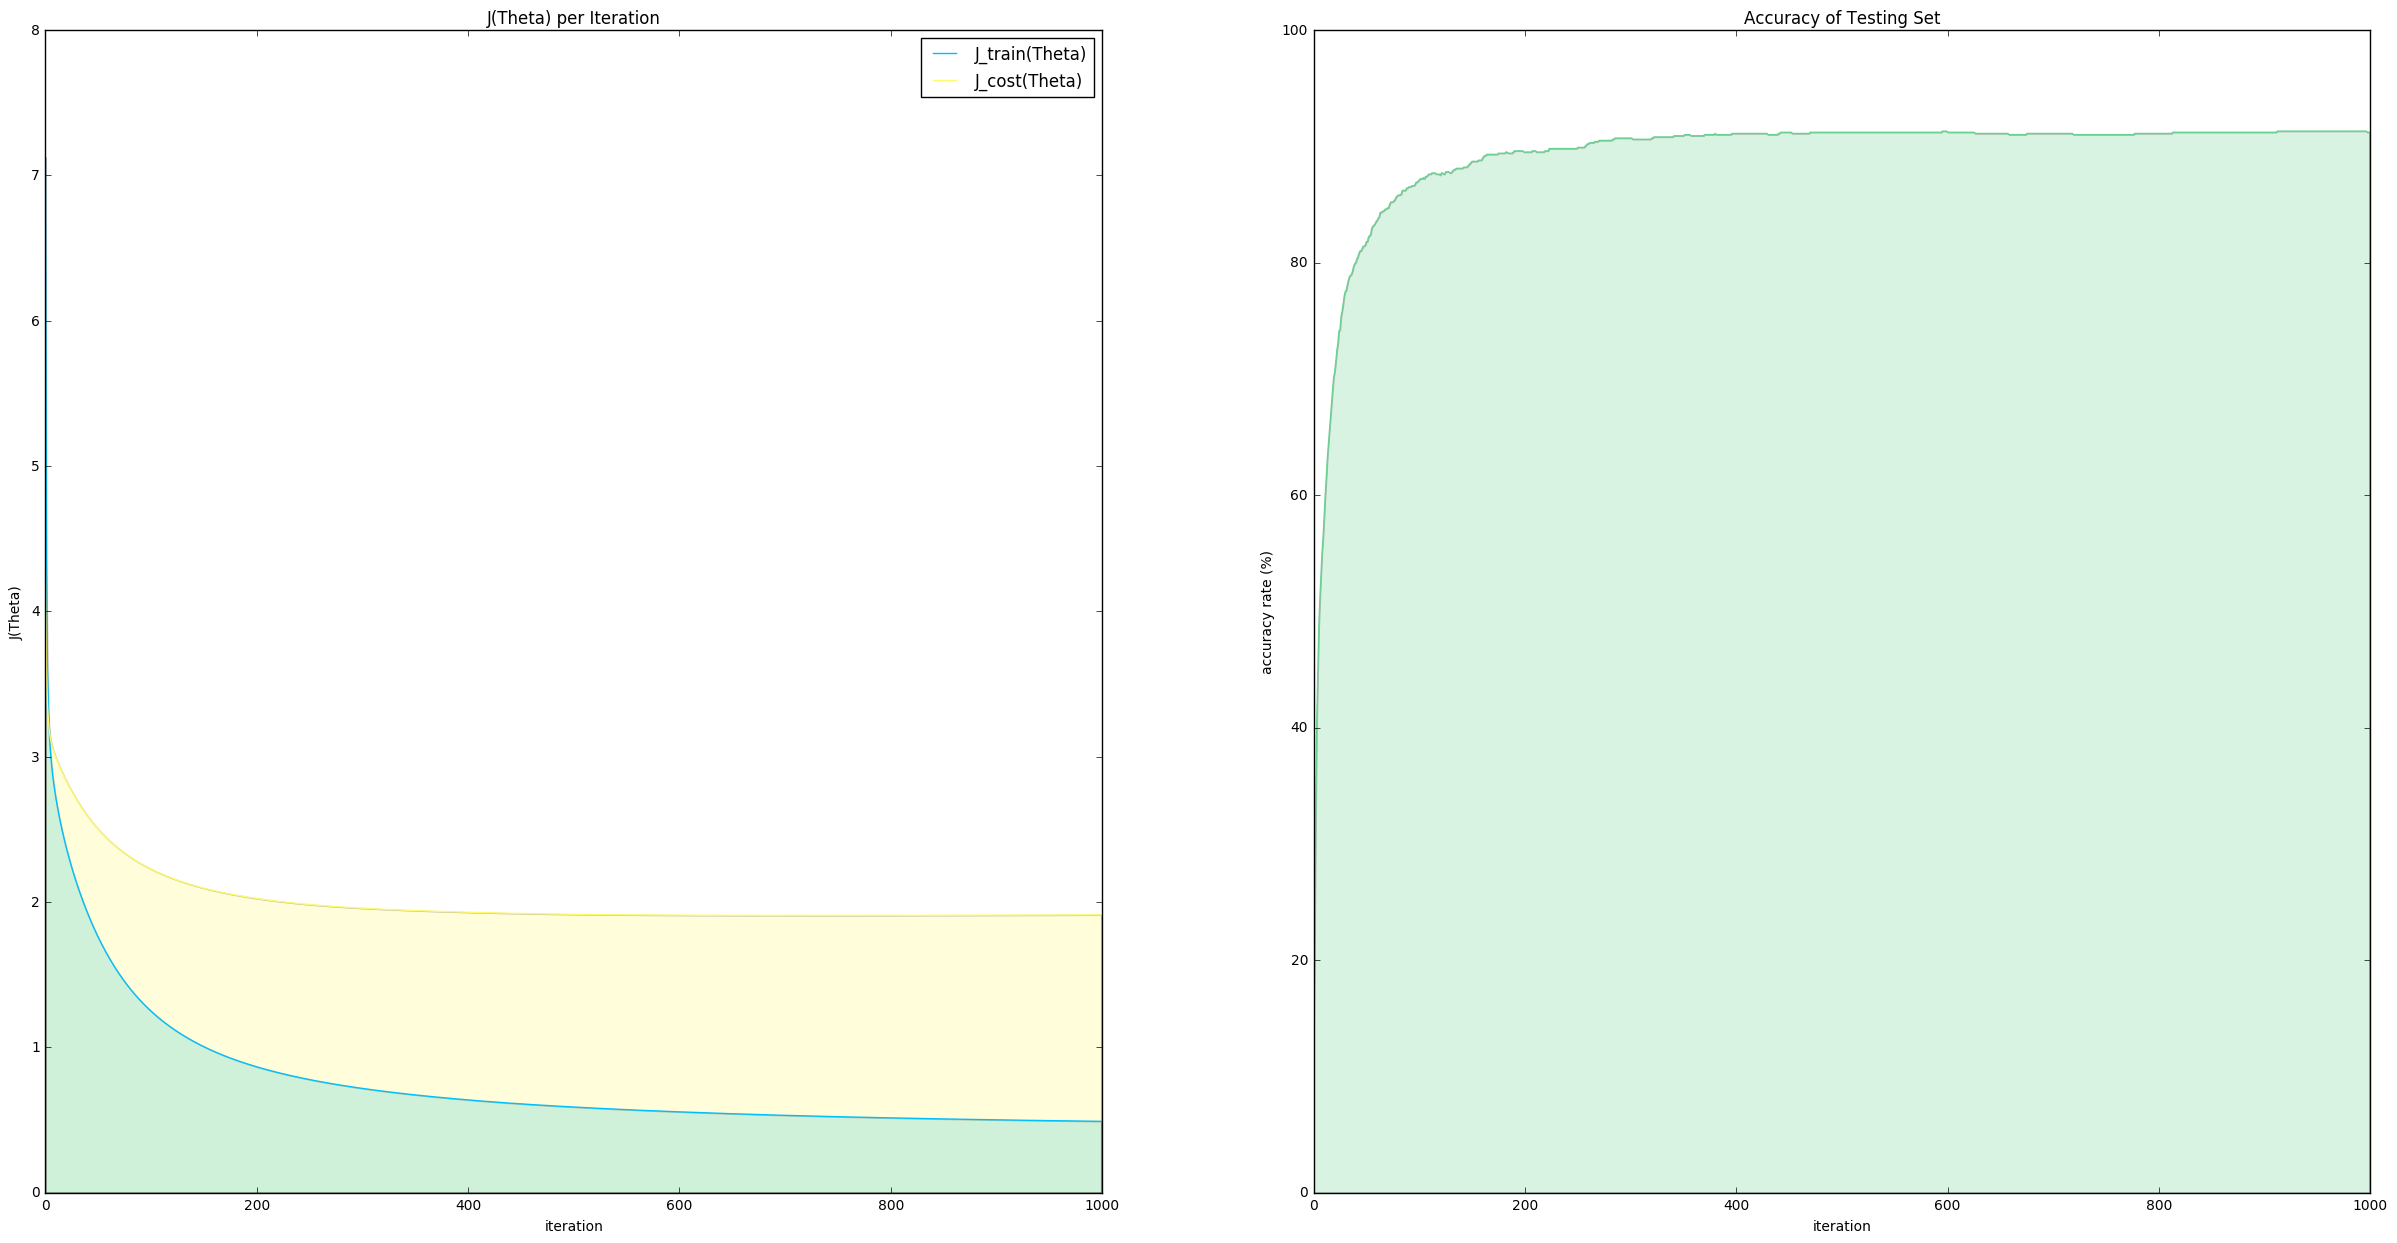

In [6]:
digits_nn.plot_training_info()
digits_nn.show_plot()

## Visualize Theta

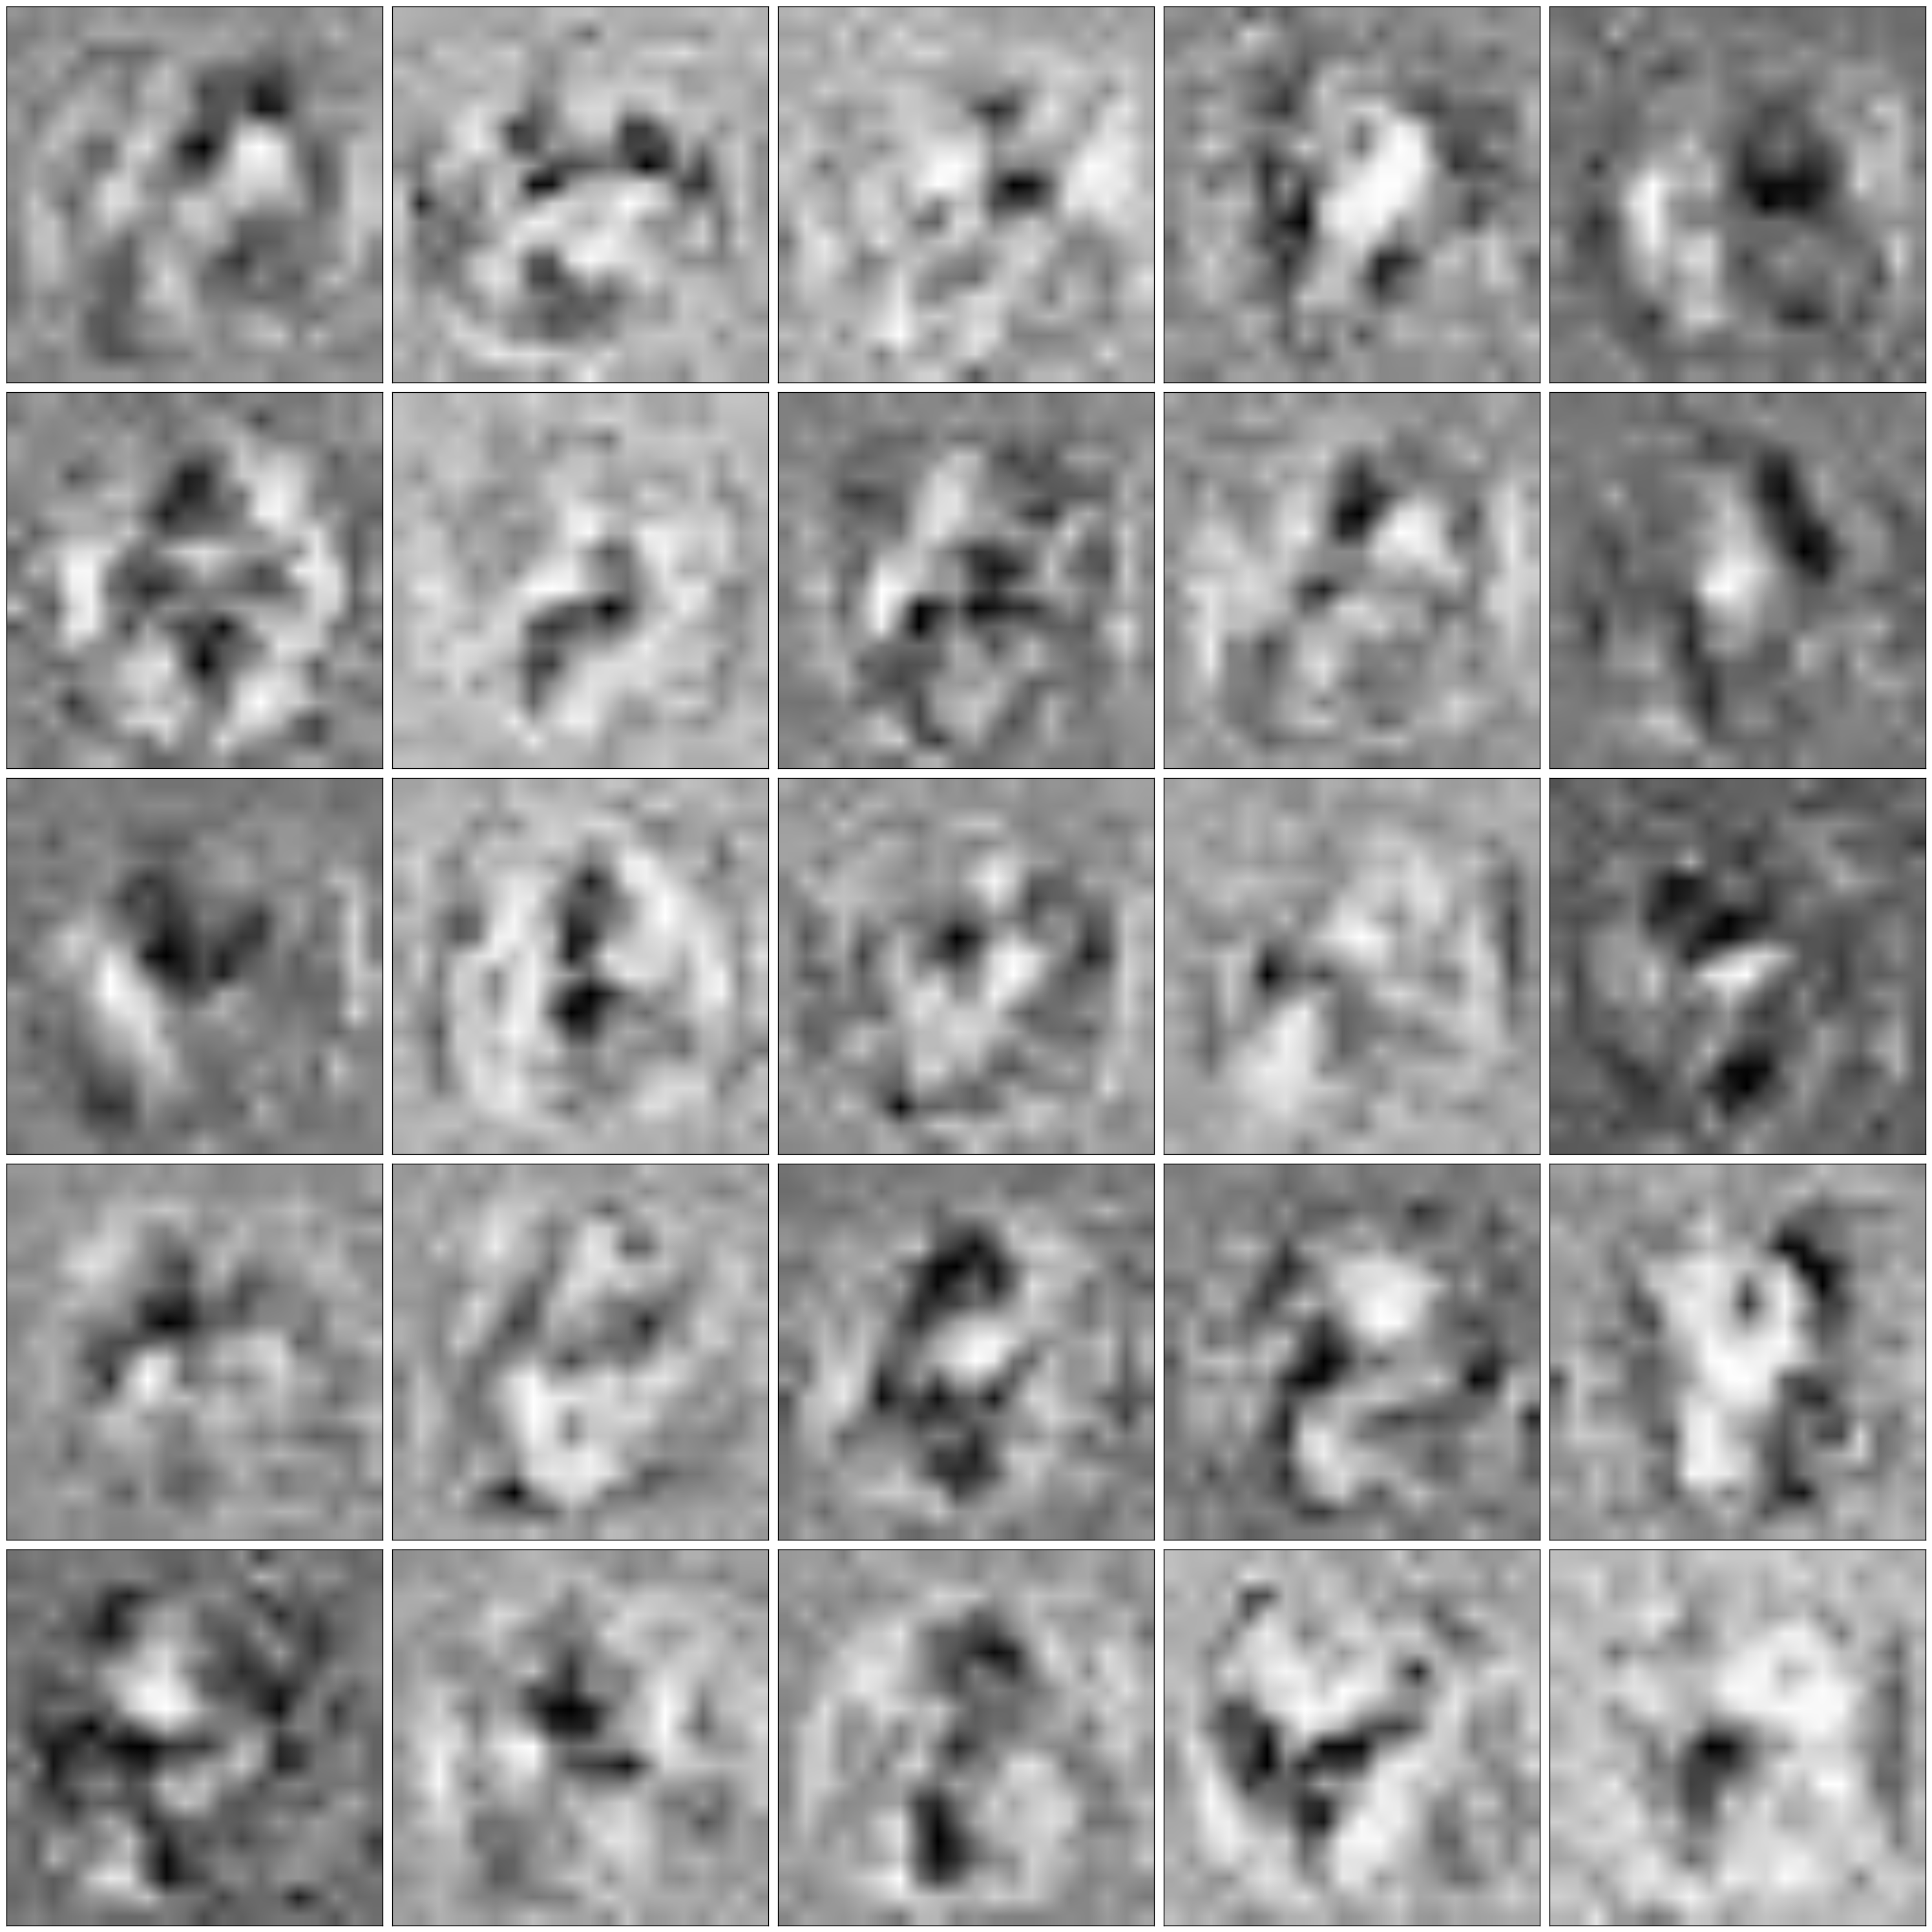

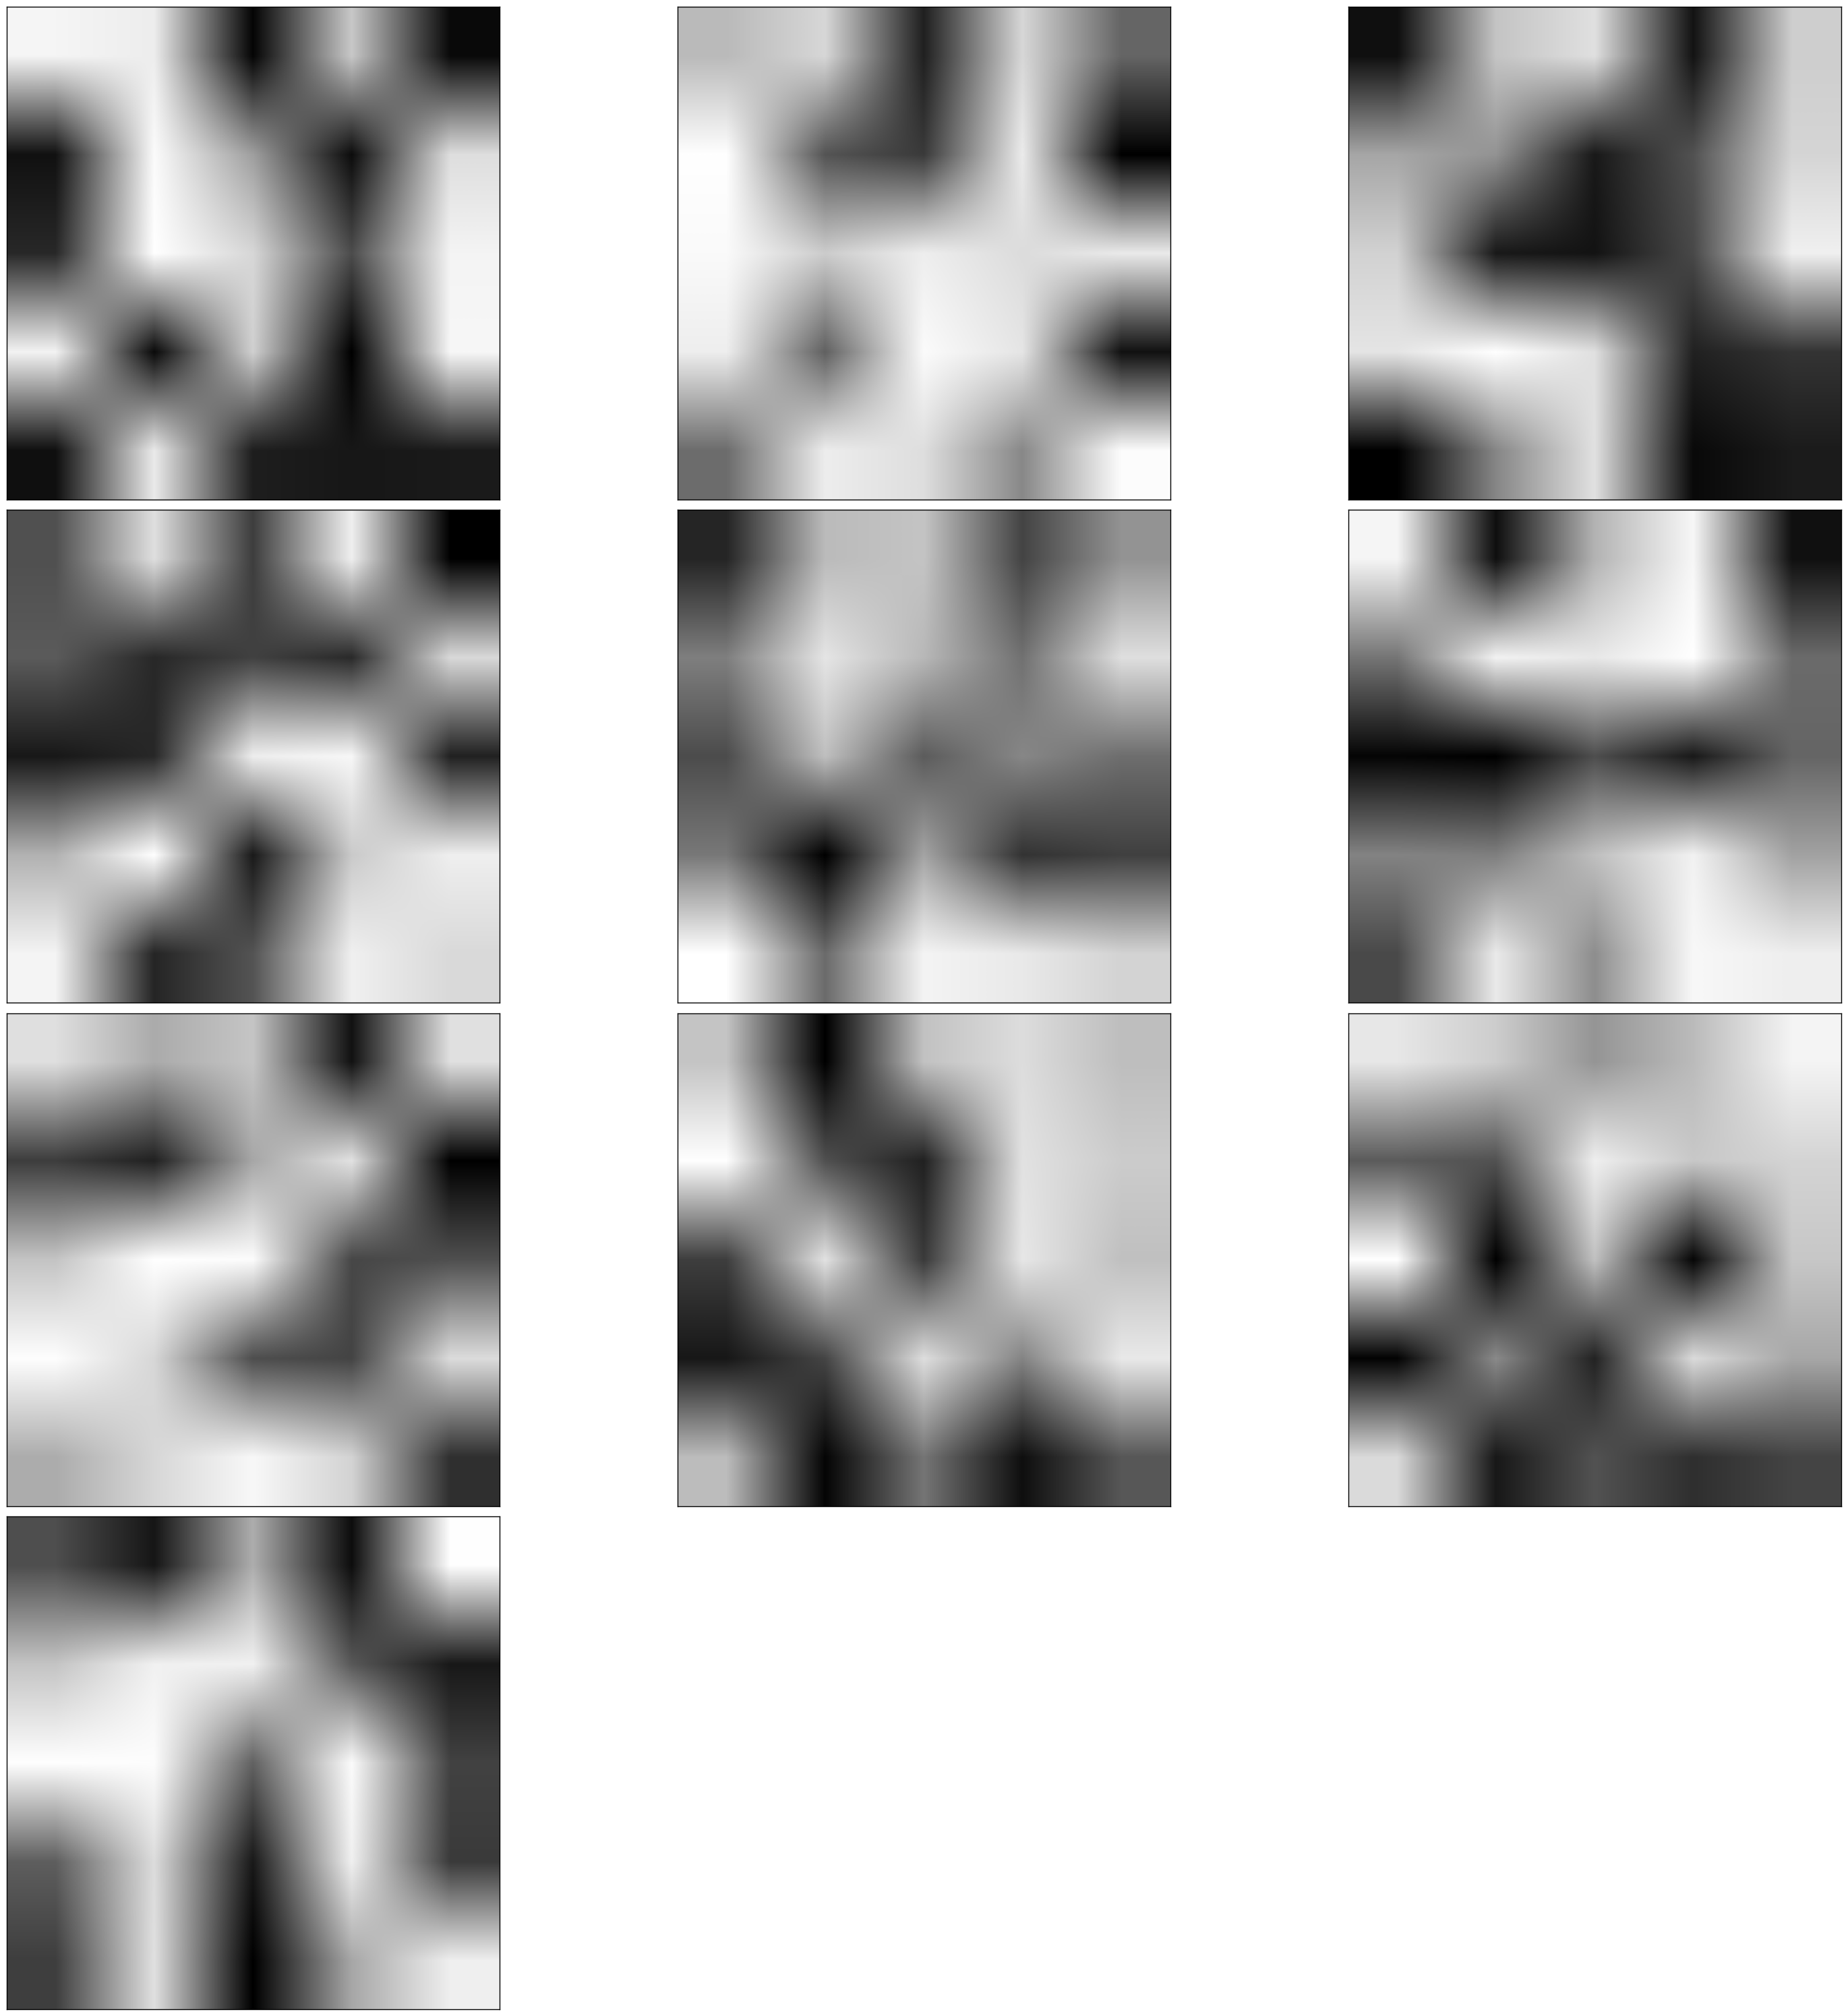

In [7]:
digits_nn.visualize_Theta(cmap='Greys_r')
digits_nn.show_plot()